In [8]:
import os
import pandas as pd

# Define the directory containing the files
directory = '/Users/ziyun/Documents/Research/weather_copy'

# Get a list of all files in the directory
files = os.listdir(directory)

# Iterate over each file
for file in files:
    # Check if the file is a CSV file
    if file.endswith('.csv'):
        # Extract sitenum from the file name
        sitenum = file.split('daily_')[1].split('.')[0][:6]
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(os.path.join(directory, file))
        
        # Add a new column named 'sitenum' with the extracted value
        df['sitenum'] = sitenum
        
        # Write the DataFrame back to the CSV file
        df.to_csv(os.path.join(directory, file), index=False)


In [7]:
import os
import pandas as pd

# Define the mapping of old column names to new column names
column_mapping = {
    "觀測時間(hour)": "date",
    "測站氣壓(hPa)": "atm",
    "海平面氣壓(hPa)": "oceanatm",
    "測站最高氣壓(hPa)": "maxatm",
    "測站最高氣壓時間(LST)": "maxatmtime",
    "測站最低氣壓(hPa)": "minatm",
    "測站最低氣壓時間(LST)": "minatmtime",
    "氣溫(℃)": "temp",
    "最高氣溫(℃)": "maxtemp",
    "最高氣溫時間(LST)": "maxtemptime",
    "最低氣溫(℃)": "mintemp",
    "最低氣溫時間(LST)": "mintemptime",
    "露點溫度(℃)": "dewtemp",
    "相對溼度(%)": "RH",
    "最小相對溼度(%)": "minRH",
    "最小相對溼度時間(LST)": "meanRHtime",
    "風速(m/s)": "windspeed",
    "風向(360degree)": "winddir",
    "最大陣風(m/s)": "maxwind",
    "最大陣風風向(360degree)": "maxwinddir",
    "最大陣風風速時間(LST)": "maxwindtime",
    "降水量(mm)": "precipitation",
    "最大十分鐘降水量(mm)": "maxtenperc",
    "日照時數(hour)": "sunduration",
    "全天空日射量(MJ/㎡)": "tsi",
    "A型蒸發量(mm)": "evaporation"
    

}

# Function to rename columns in a CSV file
def rename_columns_in_file(file_path):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Rename columns using the defined mapping
    df = df.rename(columns=column_mapping)
    
    # Save the DataFrame back to the same CSV file
    df.to_csv(file_path, index=False)

# Function to process all CSV files in a folder
def rename_columns_in_folder(folder_path):
    # Iterate through all files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            # Construct the full path to the file
            file_path = os.path.join(folder_path, file_name)
            # Call the function to rename columns in the file
            rename_columns_in_file(file_path)

# Specify the folder containing the CSV files
folder_path = "/Users/ziyun/Documents/Research/weather_copy"

# Call the function to rename columns in all CSV files in the folder
rename_columns_in_folder(folder_path)


In [23]:
import pandas as pd
import os

# Read the main file (the file you want to merge with)
main_file = pd.read_csv("/Users/ziyun/Documents/Research/Merge/merged_file_copy.csv")

# Define the folder path where your files to merge are located
folder_path = '/Users/ziyun/Documents/Research/weather_coded_copy'

# Get a list of all files in the folder
file_list = os.listdir(folder_path)

# Define the columns to keep from the files to merge
columns_to_keep = ["date", "atm", "temp", "maxtemp", "mintemp", "RH", "minRH", "windspeed", "precipitation", "sunduration", "sitenum"]

# Iterate over each file in the folder
for file_name in file_list:
    # Check if the file is a CSV file
    if file_name.endswith('.csv'):
        # Read the file into a pandas DataFrame
        file_data = pd.read_csv(os.path.join(folder_path, file_name))
        
        # Convert "Surveydate" and "date" columns to datetime format
        main_file['Surveydate'] = pd.to_datetime(main_file['Surveydate'])
        file_data['date'] = pd.to_datetime(file_data['date'])
        
        # Merge the main file with the current file based on "Surveydate" and "Sitenum"
        merged_data = pd.merge(main_file, file_data[columns_to_keep], how='inner', left_on=["Surveydate", "Sitenum"], right_on=["date", "sitenum"])
        
        # Remove columns from merged_data that already exist in main_file
        columns_to_add = [col for col in merged_data.columns if col not in main_file.columns]
        
        # Add the new columns to the main file
        for col in columns_to_add:
            main_file[col] = merged_data[col]
        
# Save the final merged data to a new file
main_file.to_csv("/Users/ziyun/Documents/Research/Merge/total_merged_files.csv", index=False)

/var/folders/7g/r43_0lx909z97yb9bxj4nl080000gp/T/ipykernel_45842/2413678107.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  main_file['Surveydate'] = pd.to_datetime(main_file['Surveydate'])


MergeError: Passing 'suffixes' which cause duplicate columns {'windspeed_x', 'maxtemp_x', 'RH_x', 'sitenum_x', 'minRH_x', 'mintemp_x', 'temp_x', 'sunduration_x', 'precipitation_x', 'atm_x', 'date_x'} is not allowed.

In [24]:
import pandas as pd

# Read the main file
main_file = pd.read_csv("/Users/ziyun/Documents/Research/Merge/merged_file_copy.csv")

# Read the file containing columns to add
other_file = pd.read_csv("/Users/ziyun/Documents/Research/weather_coded_copy/daily_72T250_2017-01-01_2021-12-31.csv")

# Convert "Surveydate" and "date" columns to datetime format
main_file['Surveydate'] = pd.to_datetime(main_file['Surveydate'])
other_file['date'] = pd.to_datetime(other_file['date'])

# Merge the main file with the other file based on "Surveydate" and "Sitenum"
merged_data = pd.merge(main_file, other_file, how='inner', left_on=["Surveydate", "Sitenum"], right_on=["date", "sitenum"])

# Define the columns to add from the other file
columns_to_add = ["atm", "temp", "maxtemp", "mintemp", "RH", "minRH", "windspeed", "precipitation", "sunduration"]

# Add the columns from the other file to the main file
for col in columns_to_add:
    main_file[col] = merged_data[col]

# Save the updated main file
main_file.to_csv("/Users/ziyun/Documents/Research/Merge/updated_main_file.csv", index=False)


/var/folders/7g/r43_0lx909z97yb9bxj4nl080000gp/T/ipykernel_45842/2005960790.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  main_file['Surveydate'] = pd.to_datetime(main_file['Surveydate'])
/var/folders/7g/r43_0lx909z97yb9bxj4nl080000gp/T/ipykernel_45842/2005960790.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  other_file['date'] = pd.to_datetime(other_file['date'])


In [28]:
import pandas as pd
import os

# Read the main file
main_file = pd.read_csv("/Users/ziyun/Documents/Research/Merge/firstmerge_main_file_copy.csv")

# Define the folder path where your other files are located
folder_path = '/Users/ziyun/Documents/Research/weather_coded_copy'

# Get a list of all files in the folder
file_list = os.listdir(folder_path)

# Define the columns to keep from the other files
columns_to_keep = [ "date", "sitenum", "atm", "temp", "maxtemp", "mintemp", "RH", "minRH", "windspeed", "precipitation", "sunduration"]

# Iterate over each file in the folder
for file_name in file_list:
    # Check if the file is a CSV file
    if file_name.endswith('.csv'):
        # Read the file into a pandas DataFrame
        other_file = pd.read_csv(os.path.join(folder_path, file_name))
        
        # Convert "Surveydate" and "date" columns to datetime format
        main_file['Surveydate'] = pd.to_datetime(main_file['Surveydate'])
        other_file['date'] = pd.to_datetime(other_file['date'])
        
        # Merge the main file with the other file based on "Surveydate" and "Sitenum"
        merged_data = pd.merge(main_file, other_file[columns_to_keep], how='inner', left_on=["Surveydate", "Sitenum"], right_on=["date", "sitenum"])
        
        # Update the columns in the main file with data from the other file
        for col in columns_to_keep:
            main_file[col] = merged_data[col]
            
# Save the updated main file to a new CSV file
main_file.to_csv("/Users/ziyun/Documents/Research/Merge/firstmerged_file.csv", index=False)


KeyError: 'atm'

In [34]:
import os
import pandas as pd

# Function to read data from main file and other files, merge them, and save to new CSV
def merge_data(main_file_path, folder_path, output_file):
    # Read main file
    main_df = pd.read_csv(main_file_path)

    # Iterate through files in folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):  # Assuming all files in folder are CSV
            file_path = os.path.join(folder_path, filename)
            # Read other file
            other_df = pd.read_csv(file_path)
            
            # Merge based on matching columns
            merged_df = pd.merge(main_df, other_df, how='left', left_on=['Surveydate', 'Sitenum'], right_on=['date', 'sitenum'])
            
            # Add required columns to main DataFrame
            # main_df['atm'] = merged_df['atm']
            # main_df['temp'] = merged_df['temp']
            # main_df['maxtemp'] = merged_df['maxtemp']
            # main_df['mintemp'] = merged_df['mintemp']
            # main_df['RH'] = merged_df['RH']
            # main_df['minRH'] = merged_df['minRH']
            # main_df['windspeed'] = merged_df['windspeed']
            # main_df['precipitation'] = merged_df['precipitation']
            # main_df['sunduration'] = merged_df['sunduration']
            
                 
            # Print merged DataFrame for debugging
            print(merged_df.head())

    # Save merged DataFrame to new CSV
    main_df.to_csv(output_file, index=False)

# Example usage
merge_data('/Users/ziyun/Documents/Research/Merge/firstmerge_main_file_copy.csv', '/Users/ziyun/Documents/Research/weather_coded_copy', '/Users/ziyun/Documents/Research/Merge/firstmerged_file.csv')


                           StudySite  Surveydate  Latitude  Longitude  \
0  Kanding Township, Pingtung County  2017-02-14  22.52506   120.4991   
1  Kanding Township, Pingtung County  2017-02-21  22.52506   120.4991   
2  Kanding Township, Pingtung County  2017-03-01  22.52506   120.4991   
3  Kanding Township, Pingtung County  2017-03-07  22.52506   120.4991   
4  Kanding Township, Pingtung County  2017-03-14  22.52506   120.4991   

   Percentage_of_diseased_leaf_area                                   Site  \
0                              0.00  Kanding Township, Pingtung County, 17   
1                              0.00  Kanding Township, Pingtung County, 17   
2                              0.00  Kanding Township, Pingtung County, 17   
3                              0.00  Kanding Township, Pingtung County, 17   
4                              0.26  Kanding Township, Pingtung County, 17   

        Lat       Lon Sitenum   atm_x  ...  sunduration_y  tsi  evaporation  \
0  22.52506  

In [69]:
import pandas as pd
import os

# List the files in the folder
folder_path = '/Users/ziyun/Documents/Research/weather_coded_copy'
file_list = os.listdir(folder_path)


# Columns to keep
columns_to_keep = ["date","atm", "temp", "maxtemp", "mintemp", "RH", "minRH", "windspeed", "precipitation", "sunduration","sitenum"]

# Initialize an empty DataFrame to store the merged data
merged_data = pd.DataFrame(columns=columns_to_keep)

# Loop through each file
for file_name in file_list:
    # Read each file into a DataFrame
    
    if file_name=='.DS_Store':
        continue
    # print(file_name)
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path, encoding = "ISO-8859-1")
    # print(df.columns)
    # print(columns_to_keep)
    # Keep only the specified columns
    df = df[columns_to_keep]
    
    # 
    # Merge with existing data
    merged_data = pd.concat([merged_data, df])
    # print(merged_data)
    # print(df)
    # print(df.columns)

# Write the merged data to a new file
merged_file_path = '/Users/ziyun/Documents/Research/Merge/weathermerged_file.csv'
merged_data.to_csv(merged_file_path, index=False)
# import pandas as pd
# 'date', 'atm', 'temp', 'maxtemp', 'mintemp', 'RH', 'minRH', 'windspeed', 'precipitation', 'sunduration', 'sitenum'

/var/folders/7g/r43_0lx909z97yb9bxj4nl080000gp/T/ipykernel_45842/1236674904.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  merged_data = pd.concat([merged_data, df])


In [74]:
import pandas as pd
import numpy as np

# Assuming you have your data stored in a DataFrame called 'df'
# Replace 'your_dataset.csv' with the actual path to your dataset
df = pd.read_csv('/Users/ziyun/Documents/Research/Merge/weathermerged_file_copy.csv')

# Specify the columns you want to check for abnormal data and missing values
columns_to_check = ["atm", "temp", "maxtemp", "mintemp", "RH", "minRH", "windspeed", "precipitation", "sunduration"]

# Loop through each specified column and drop negative values
for col in columns_to_check:
    df = df[(df[col] >= 0)]

# Function to identify outliers using the interquartile range (IQR) method
def find_outliers(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

# Loop through each column and identify outliers and missing values
for column in columns_to_check:
    print(f"Column: {column}")
    
    # Find missing values (NA)
    na_count = df[column].isna().sum()
    print(f"Number of missing values (NA): {na_count}")
    
    # Find outliers
    outliers = find_outliers(df[column])
    outlier_count = outliers.sum()
    print(f"Number of outliers: {outlier_count}")
    if outlier_count > 0:
        print("Outlier indices:")
        print(df[outliers].index.tolist())
    print()



Column: atm
Number of missing values (NA): 0
Number of outliers: 22
Outlier indices:
[127, 492, 511, 512, 527, 1216, 1217, 1218, 1326, 7443, 7608, 8269, 8289, 8290, 8291, 8994, 8995, 8996, 8997, 8998, 9046, 20641]

Column: temp
Number of missing values (NA): 0
Number of outliers: 6
Outlier indices:
[13, 7777, 8799, 8800, 20465, 20466]

Column: maxtemp
Number of missing values (NA): 0
Number of outliers: 27
Outlier indices:
[12, 13, 1013, 1021, 7439, 7440, 7441, 7752, 7753, 7775, 7776, 7777, 7778, 7779, 7784, 7808, 8454, 8455, 8473, 8791, 8799, 8800, 8801, 8802, 8803, 20466, 20772]

Column: mintemp
Number of missing values (NA): 0
Number of outliers: 8
Outlier indices:
[2, 14, 680, 1023, 1027, 8804, 8805, 20466]

Column: RH
Number of missing values (NA): 0
Number of outliers: 8
Outlier indices:
[753, 7490, 7753, 20398, 20405, 20466, 20523, 20564]

Column: minRH
Number of missing values (NA): 0
Number of outliers: 92
Outlier indices:
[47, 51, 131, 132, 143, 144, 192, 193, 196, 197, 198, 

In [79]:
import pandas as pd
from datetime import timedelta

# Step 1: Read the file containing dates into a DataFrame
# Replace 'your_file.csv' with the path to your file
df = pd.read_csv('/Users/ziyun/Documents/Research/Merge/merged_file_copy.csv')

# Step 2: Parse the dates if they are not already in datetime format
# If your dates are already in datetime format, you can skip this step

# Assuming your date column is named 'date', parse it to datetime format
df['date'] = pd.to_datetime(df['Surveydate'])

# Step 3: Create a list of 6 additional dates to add after each date
additional_dates = [df['date'] + timedelta(days=i) for i in range(1, 7)]

# Step 4: Append the additional dates to the DataFrame
# Concatenate the original DataFrame with the additional dates
df_extended = pd.concat([df] + additional_dates, ignore_index=True)

# Step 5: Save the modified DataFrame to a new file if needed
# Replace 'output_file.csv' with the desired filename to save the modified DataFrame
df_extended.to_csv('/Users/ziyun/Documents/Research/Merge/merged_file_dateappend.csv', index=False)

# Display the first few rows of the modified DataFrame
print("Modified DataFrame with additional dates:")
print(df_extended)



Modified DataFrame with additional dates:
                               StudySite Surveydate  Latitude  Longitude  \
0      Kanding Township, Pingtung County    2/14/17  22.52506   120.4991   
1      Kanding Township, Pingtung County    2/21/17  22.52506   120.4991   
2      Kanding Township, Pingtung County     3/1/17  22.52506   120.4991   
3      Kanding Township, Pingtung County     3/7/17  22.52506   120.4991   
4      Kanding Township, Pingtung County    3/14/17  22.52506   120.4991   
...                                  ...        ...       ...        ...   
10579                                NaN        NaN       NaN        NaN   
10580                                NaN        NaN       NaN        NaN   
10581                                NaN        NaN       NaN        NaN   
10582                                NaN        NaN       NaN        NaN   
10583                                NaN        NaN       NaN        NaN   

       Percentage_of_diseased_leaf_area  \
0 

/var/folders/7g/r43_0lx909z97yb9bxj4nl080000gp/T/ipykernel_45842/3762205044.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['Surveydate'])


/var/folders/7g/r43_0lx909z97yb9bxj4nl080000gp/T/ipykernel_45842/3061837447.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Surveydate'] = pd.to_datetime(df['Surveydate'])


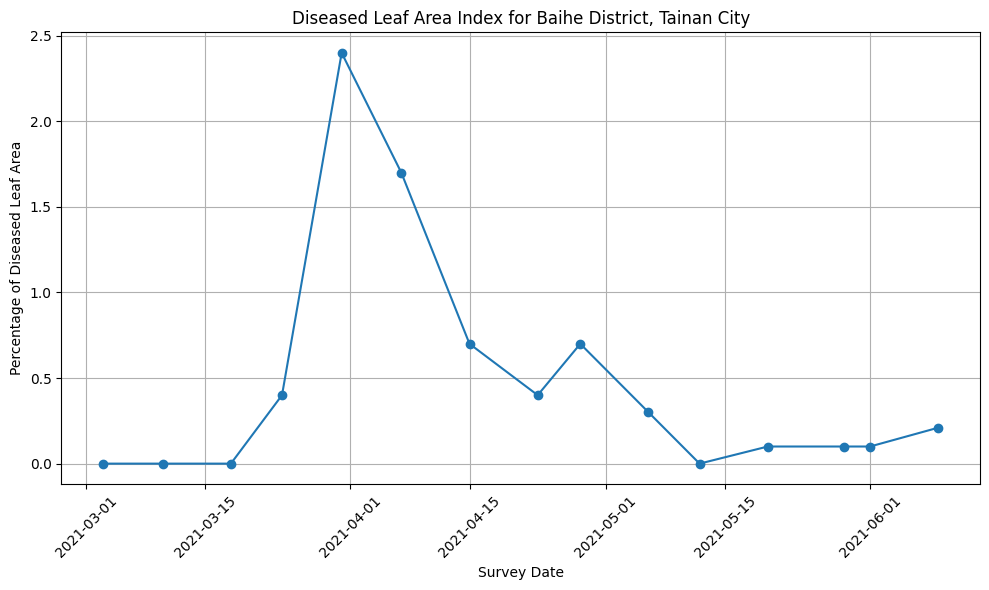

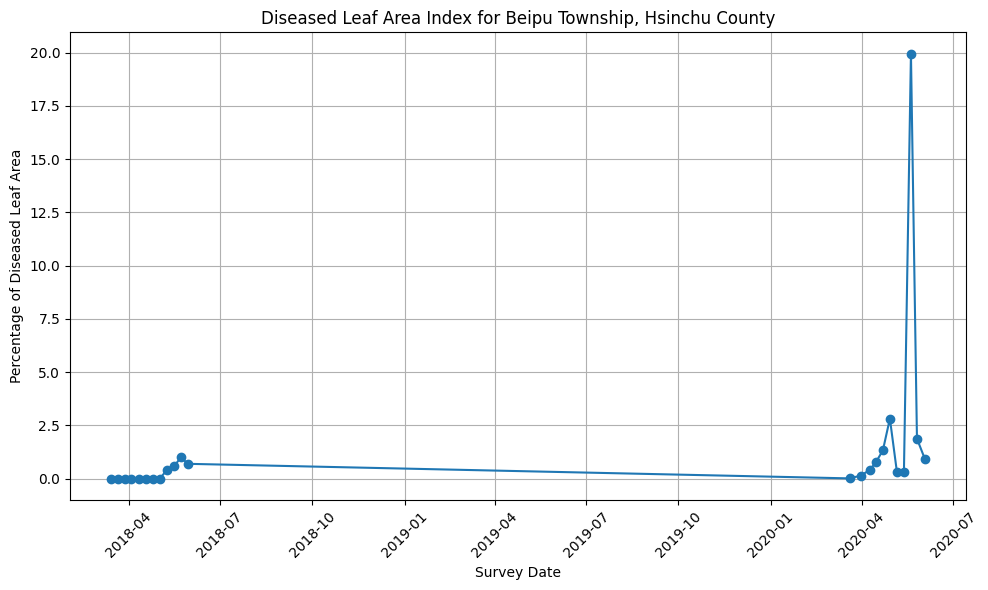

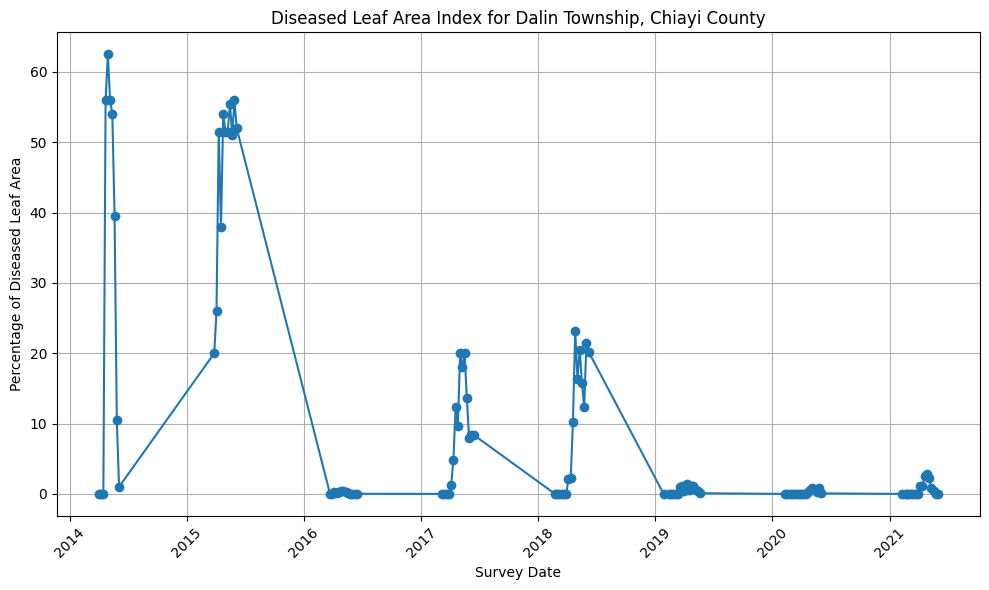

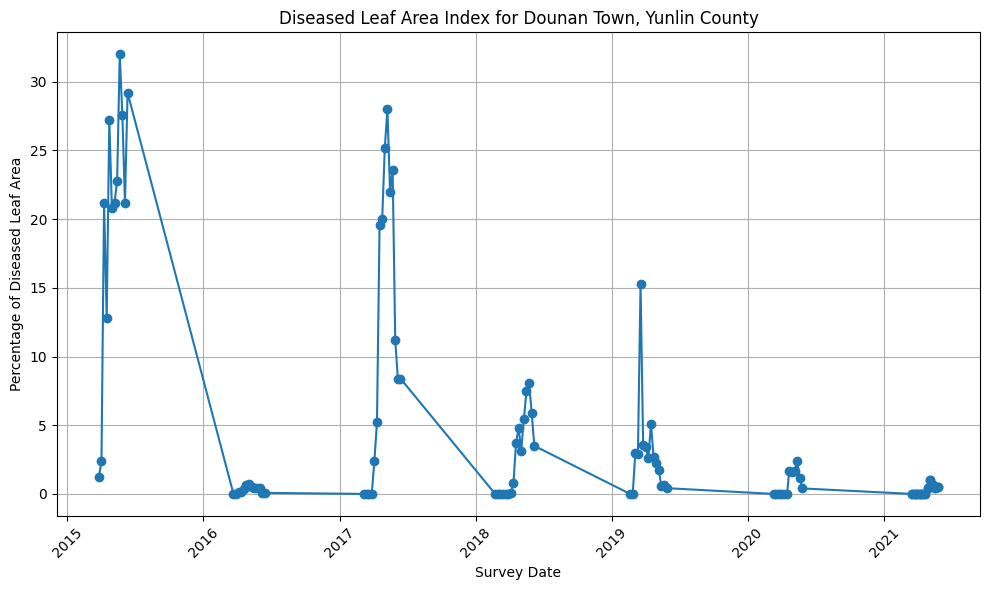

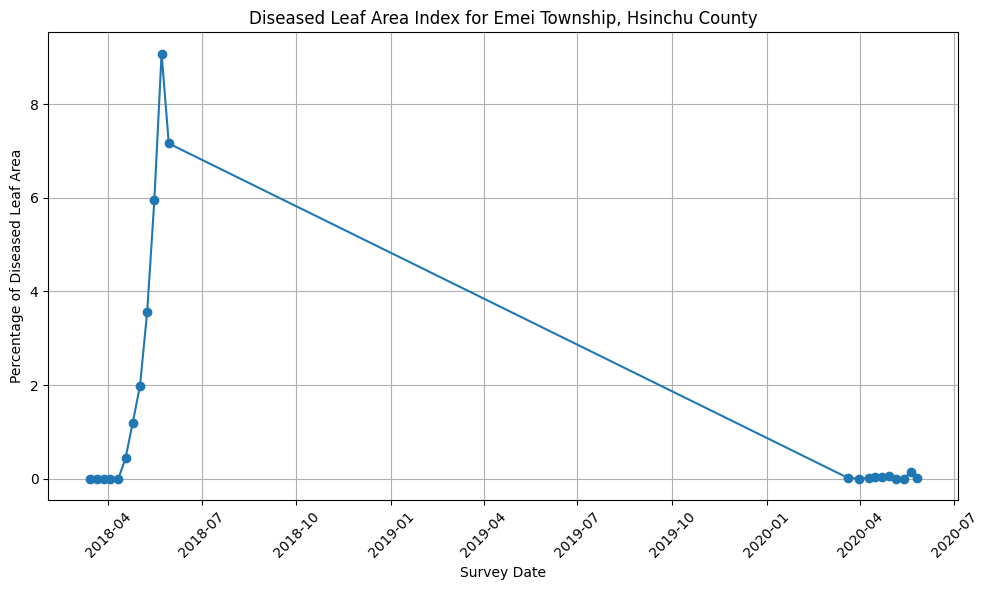

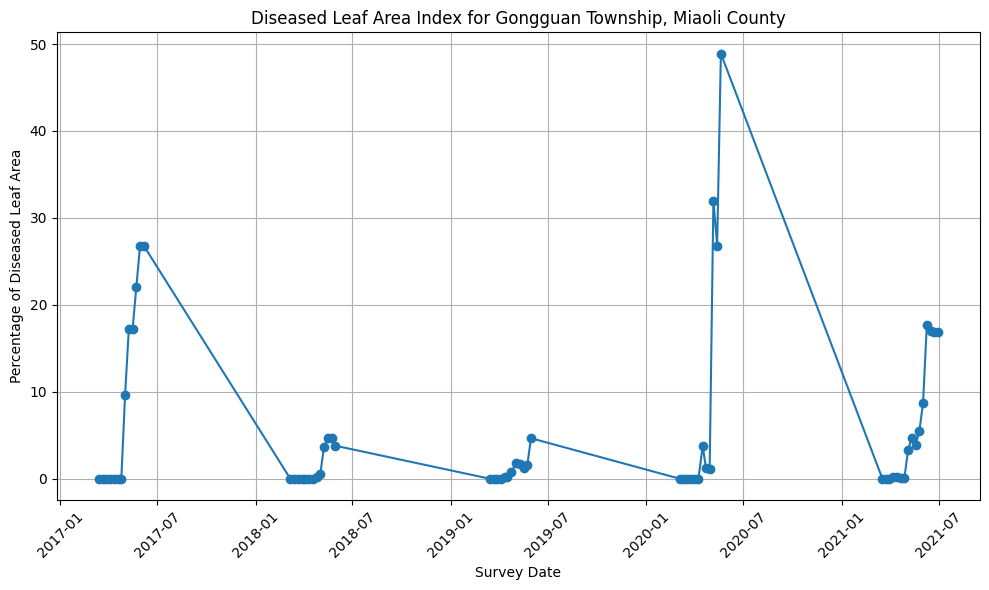

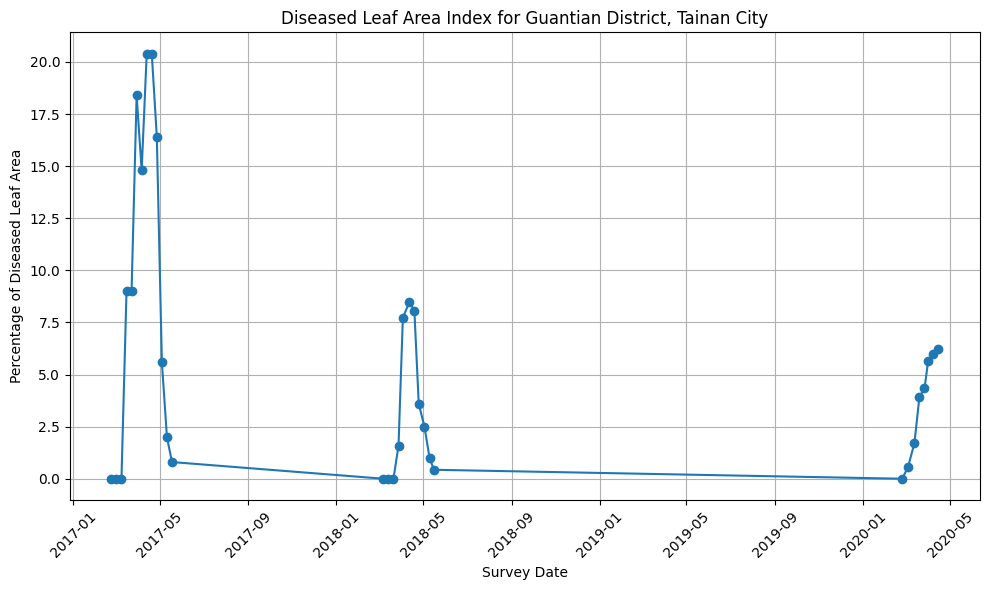

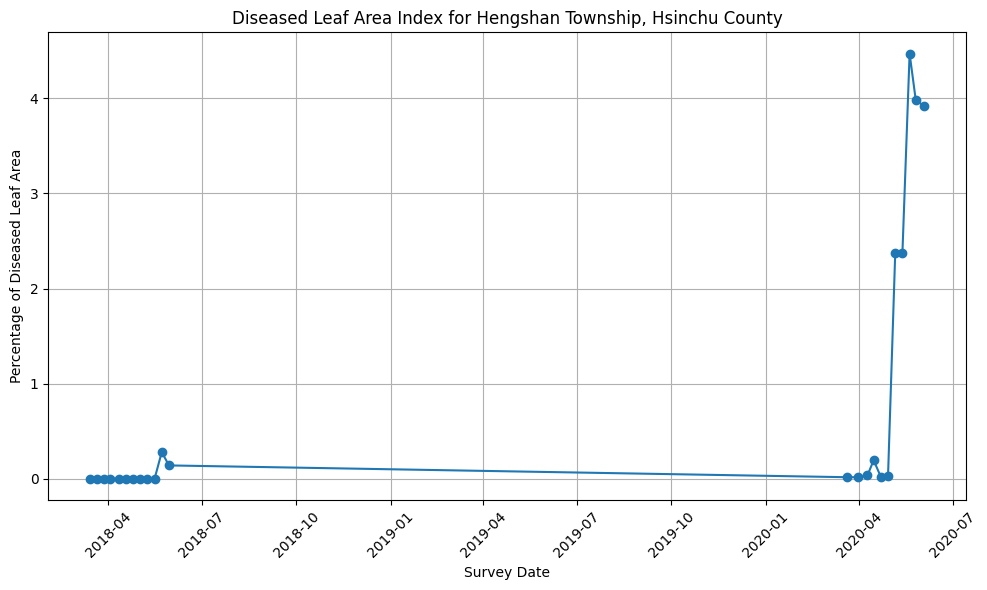

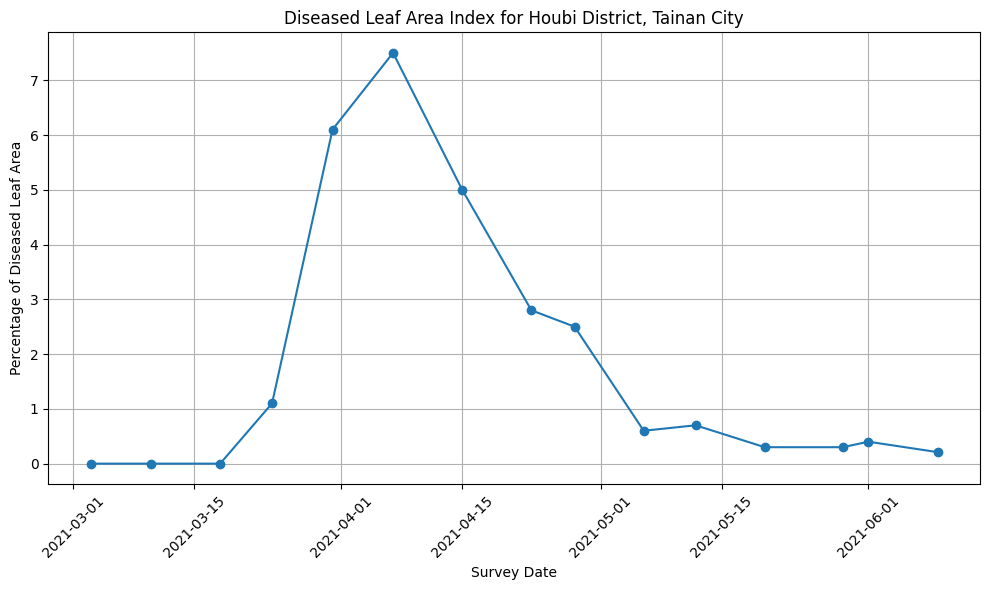

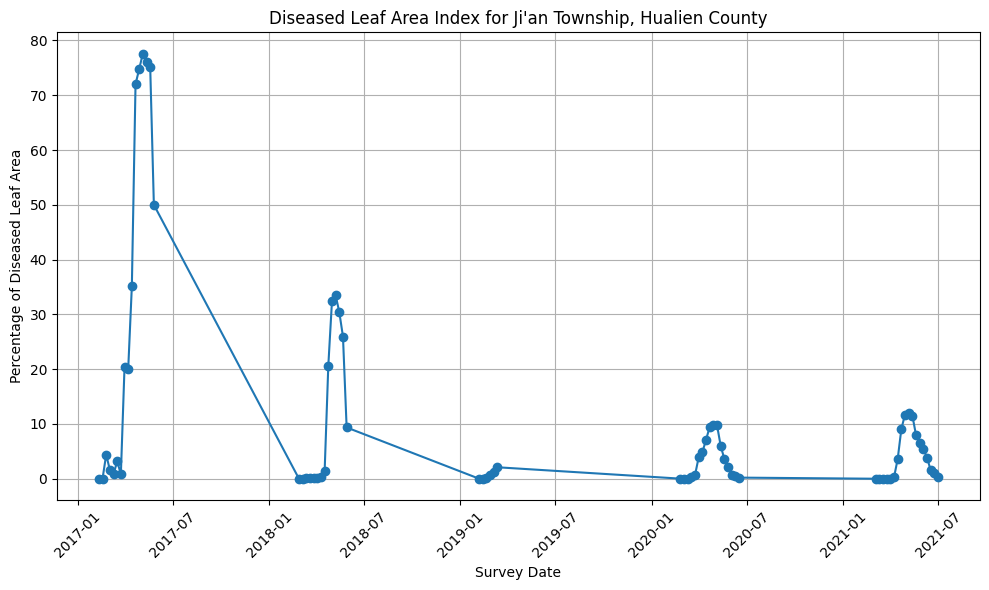

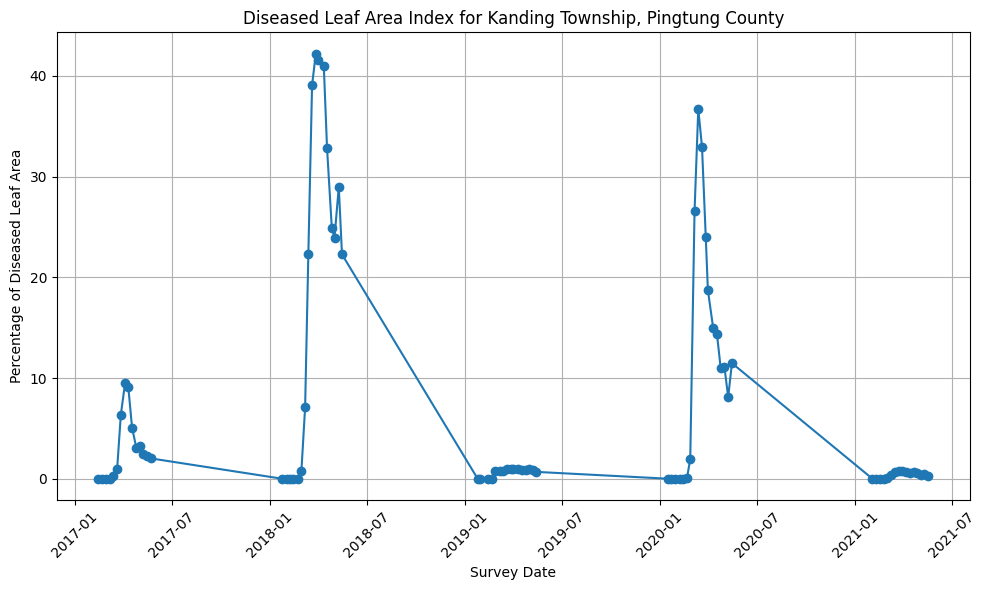

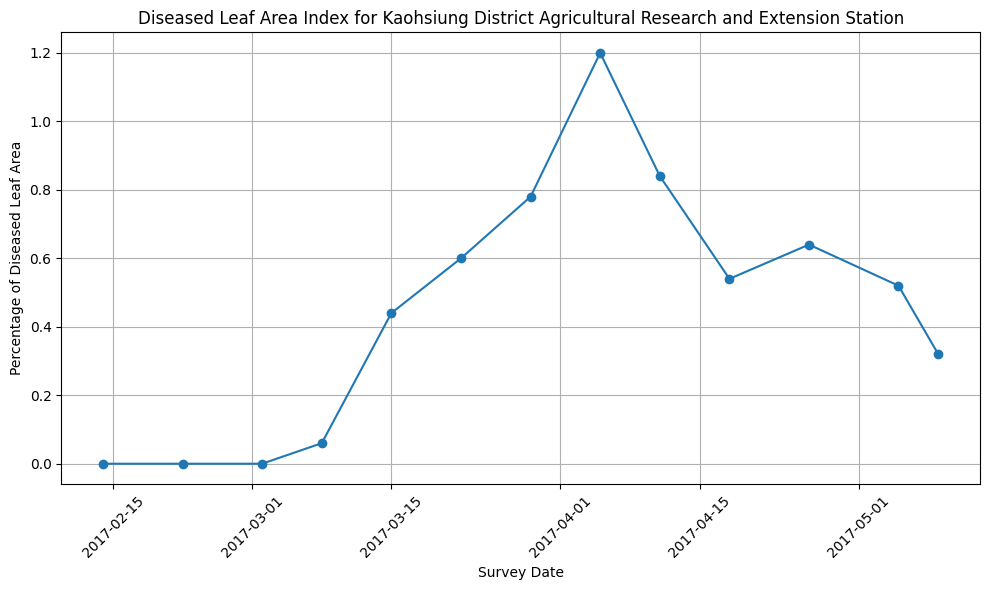

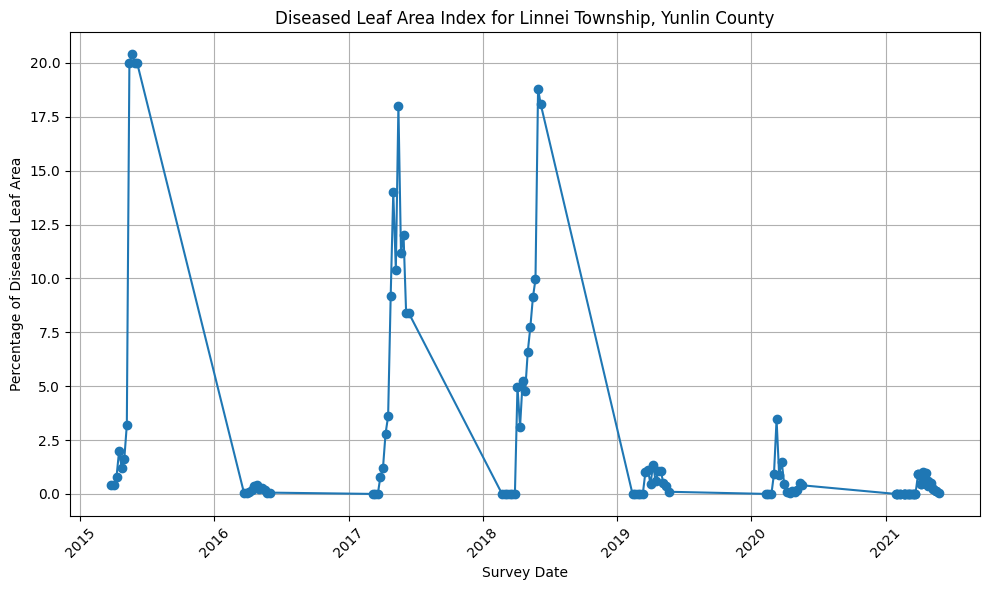

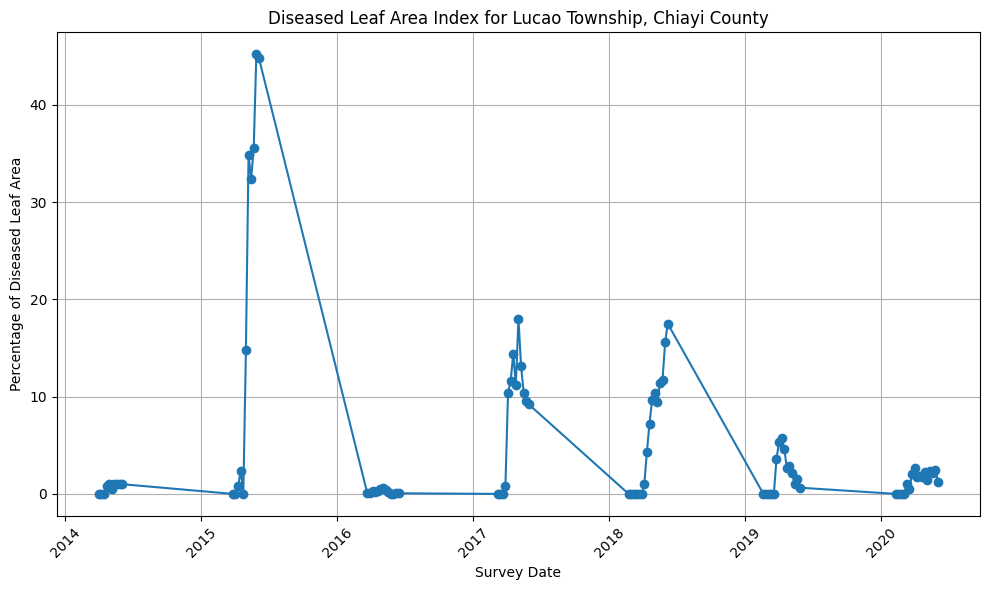

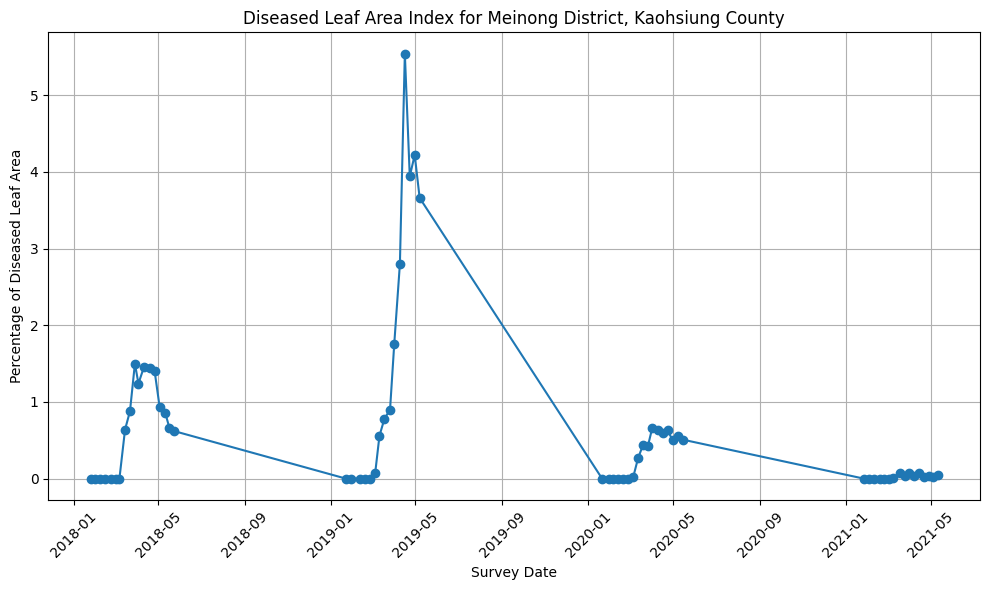

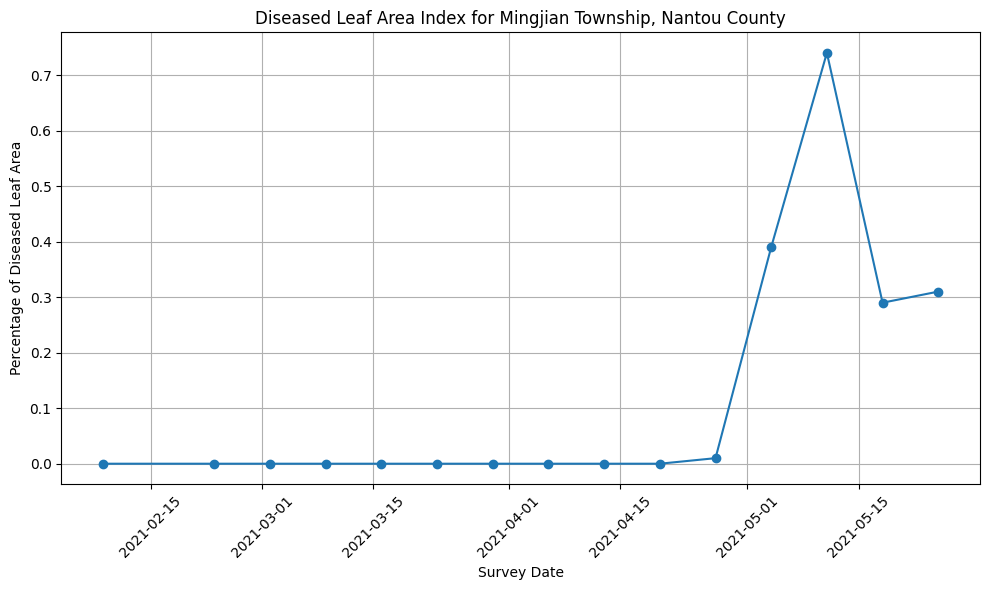

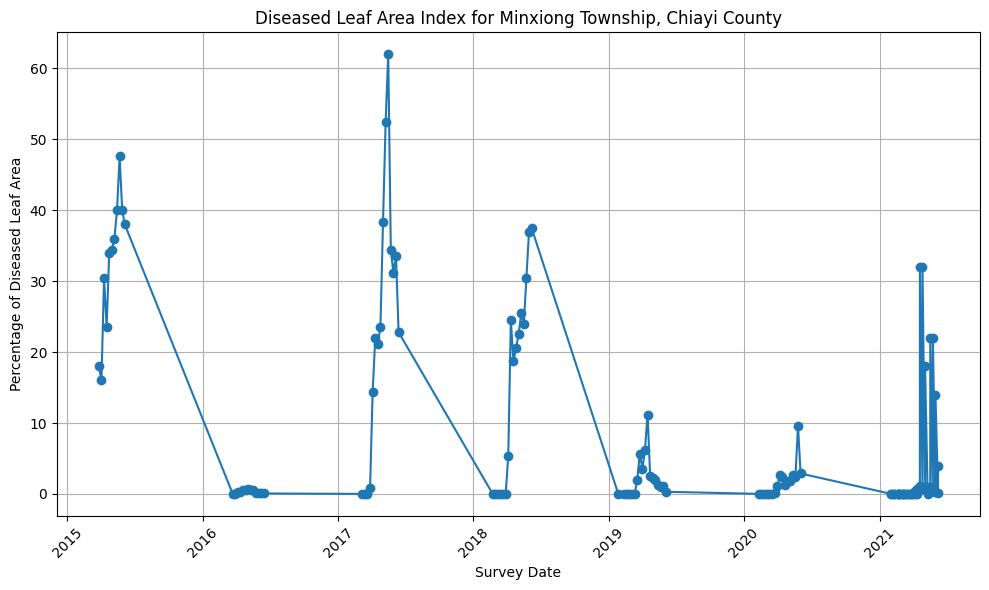

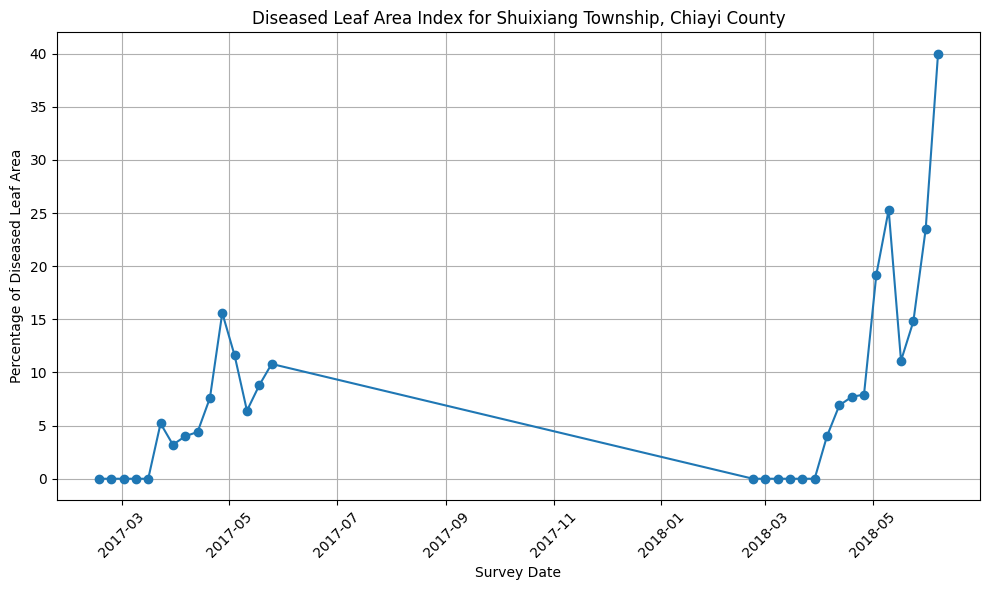

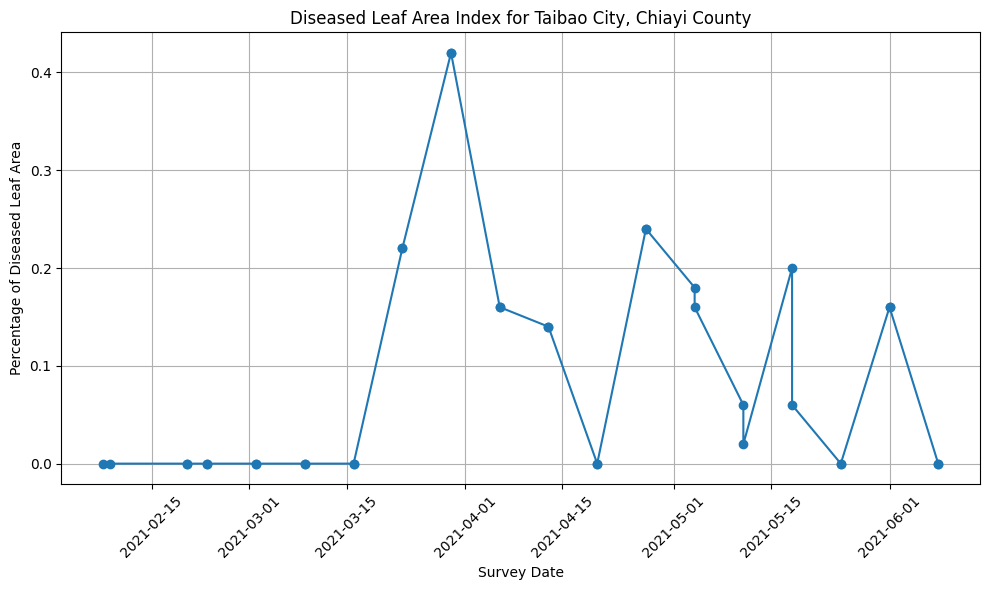

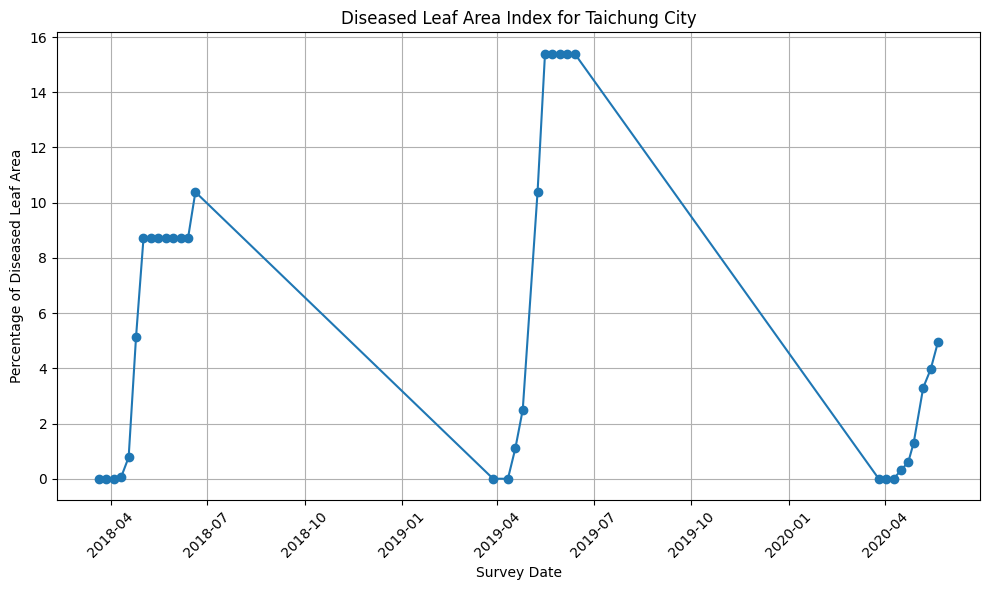

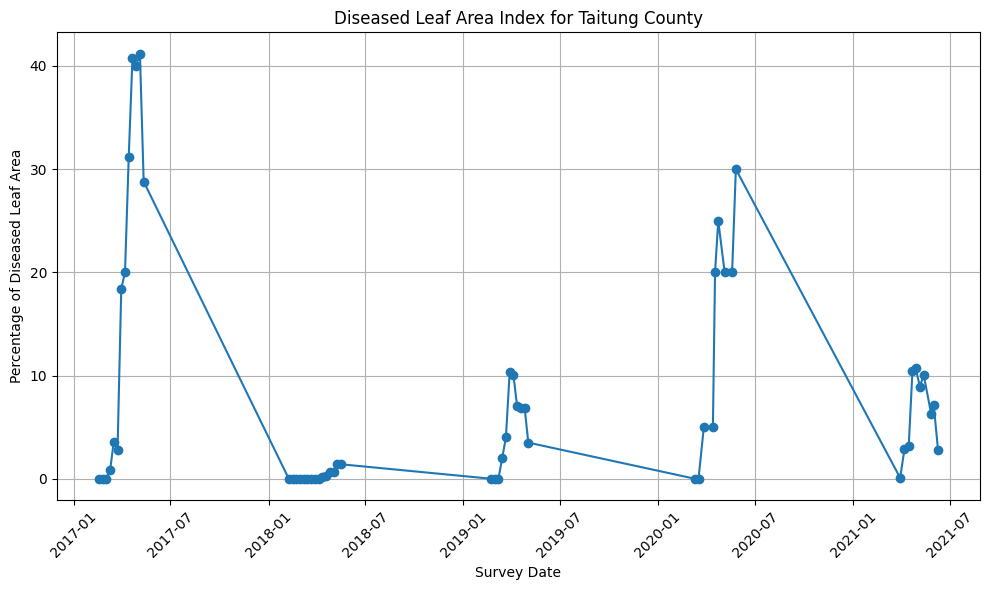

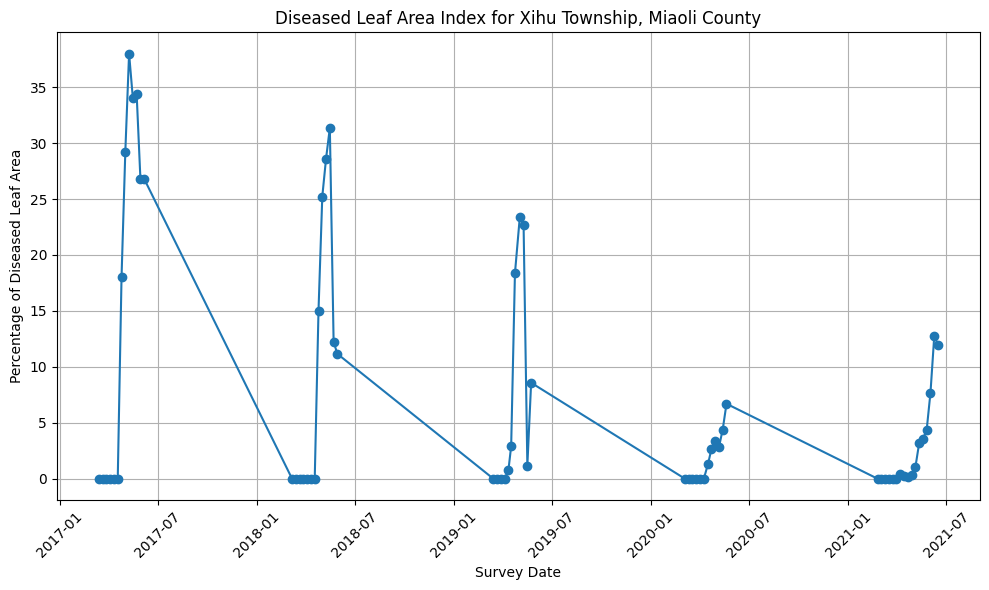

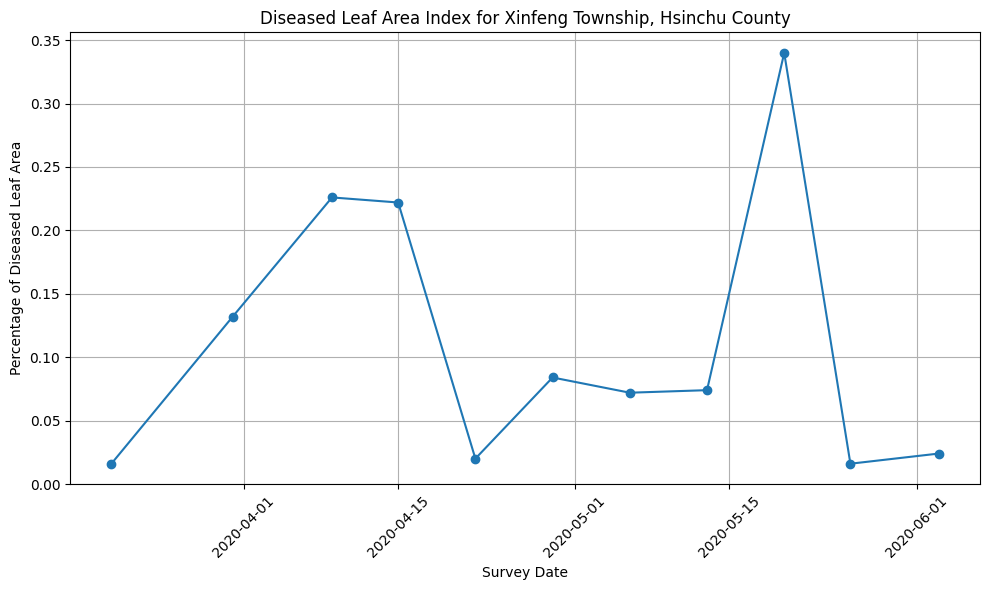

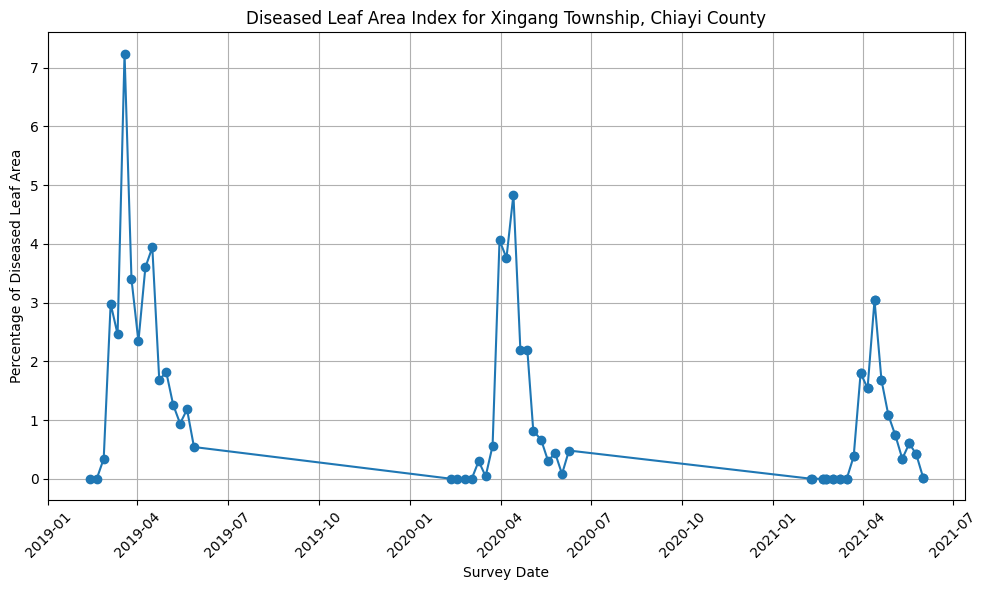

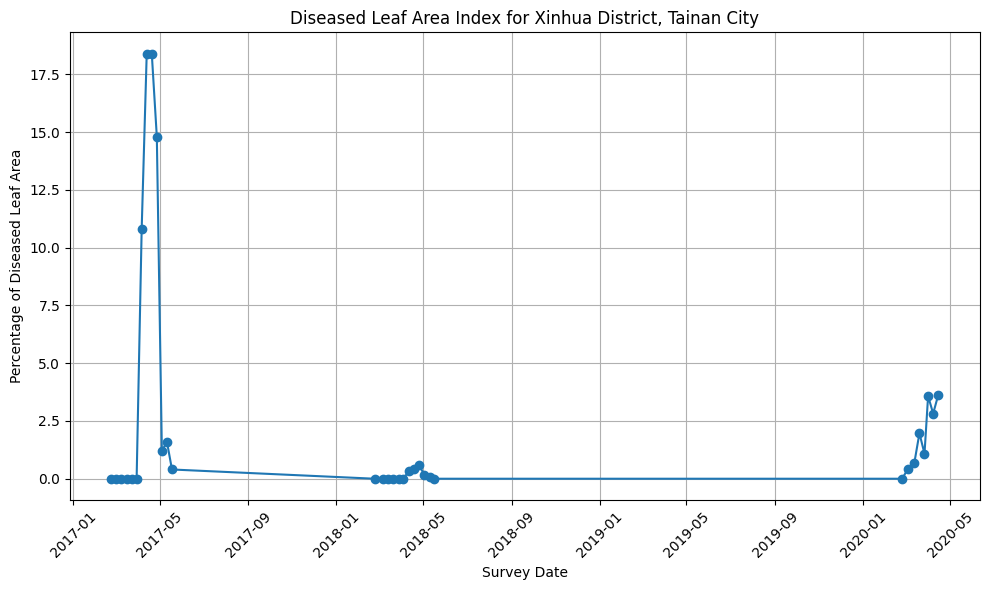

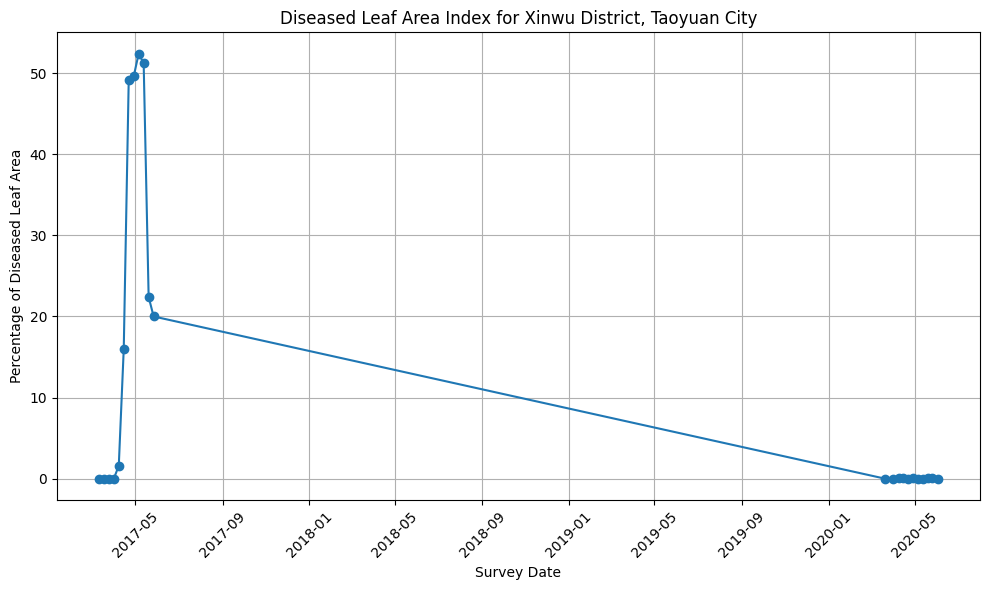

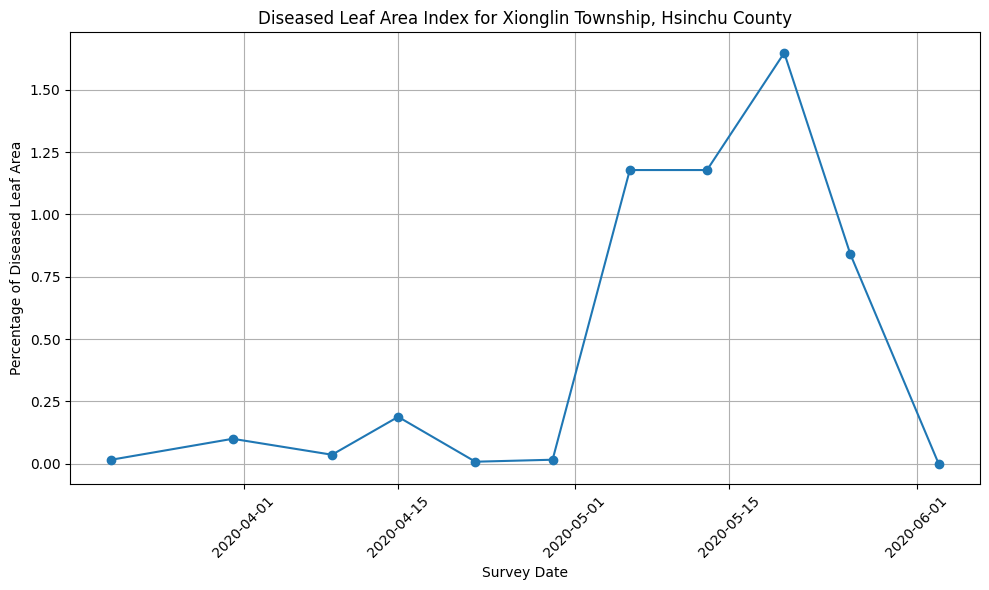

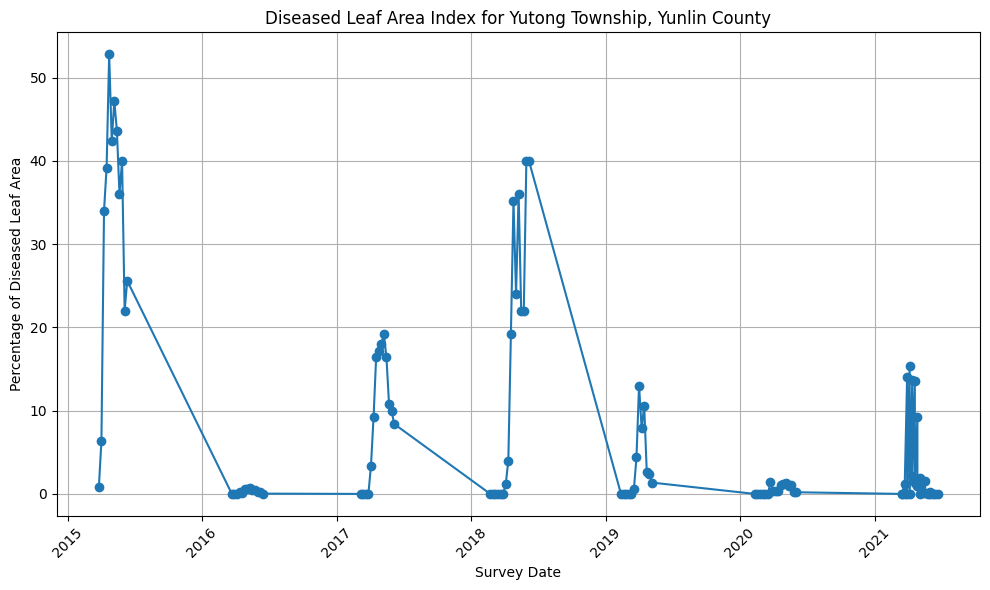

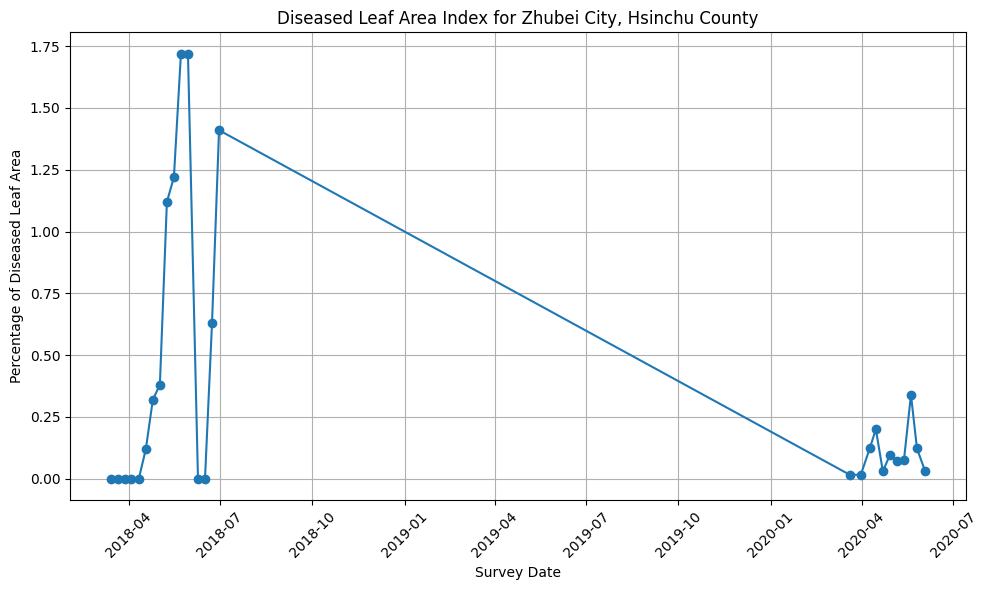

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the file into a DataFrame
# Replace 'your_file.csv' with the path to your file
df = pd.read_csv('/Users/ziyun/Documents/Research/Merge/merged_file_copy.csv')

# Step 2: Convert 'Surveydate' to datetime if it's not already in datetime format
df['Surveydate'] = pd.to_datetime(df['Surveydate'])

# Step 3: Iterate over unique StudySite values and create separate plots
for site, data in df.groupby('StudySite'):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Surveydate'], data['Percentage_of_diseased_leaf_area'], marker='o', linestyle='-')
    plt.title(f'Diseased Leaf Area Index for {site}')
    plt.xlabel('Survey Date')
    plt.ylabel('Percentage of Diseased Leaf Area')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)
    plt.tight_layout()
    plt.show()
